# Part1 Accuracy


Setup	             Cross-validation Accuracy
Unprocessed data	0.7597402597402597
0-value elements ignored	0.7439403561803251


# Part2 Code Snippets

In [ ]:
# Library used
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mnist import MNIST
from PIL import Image
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set()
from mnist import MNIST
from sklearn.ensemble import RandomForestClassifier
# This is the train split 
def testsp(x):
    np.random.shuffle(x)
    row = x.shape[0]
    return x[:int(0.8 * row)],x[int(0.8 * row):]
# This will give us P(X|y), when we know x, mean and variance of x given y
def p_x_given_y(x, mean_y, variance_y):
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    return p
# This will give us P(y),a 1D array contains all probabilities of 10 labels
def plabel(ytr):
    unique, counts = np.unique(ytr, return_counts=True)
    return counts / len(ytr)
# Calculation of distribution parameters and naive Bayes predictions
def Gaussian_mybayes(xtr,ytr,xte,yte,convert_na = False):
    df = pd.DataFrame(np.concatenate((xtr,ytr.reshape((ytr.shape[0],1))),axis = 1)
                      ,columns = range(xtr.shape[1] + 1))
    df.rename(columns = {xtr.shape[1]:"label"},inplace = True)
    if(convert_na == True):
        df.loc[df[2] == 0,2] = None
        df.loc[df[3] == 0,3] = None
        df.loc[df[5] == 0,5] = None
        df.loc[df[7] == 0,7] = None
    me = df.groupby("label").mean().to_dict()
    va = df.groupby("label").var().to_dict()
    pl = plabel(ytr)
    yp = np.zeros(len(xte))
    for i in range(len(xte)):
        p = np.zeros(len(np.unique(ytr)))
        for j in range(df.shape[1]-1):
            for k in range(len(p)):
                mk = me[j][k]
                vk = va[j][k]
                if(vk == 0):
                    vk += 0.01
                x = p_x_given_y(xte[i,j],mk,vk)
                if(x == 0):
                    p[k] -= 50
                else:
                    p[k] += np.log(x)
        np.add(p,np.log(pl),out = p)
        yp[i] = np.argmax(p)
    return (yte == yp).sum() / len(yte)

# Part 2 MNIST Accuracies
x	       Method	                  Training Set Accuracy	    Test Set Accuracy
1	Gaussian + untouched	 	      0.8085                      0.8111
2	Gaussian + stretched	 	      0.809                       0.8131
3	Bernoulli + untouched	 	      0.8212                      0.8150
4	Bernoulli + stretched	 	      0.8331                      0.844
5	10 trees + 4 depth + untouched	  0.6779666666666667          0.6914999999999999
6	10 trees + 4 depth + stretched	  0.7244 	                  0.7361166666666666
7	10 trees + 16 depth + untouched	  0.9169833333333334	      0.9374
8	10 trees + 16 depth + stretched	  0.9254	                  0.9213166666666667
9	30 trees + 4 depth + untouched	  0.7373166666666665	      0.7284
10	30 trees + 4 depth + stretched	  0.7538499999999999          0.7553999999999999
11	30 trees + 16 depth + untouched	  0.9507166666666666	      0.957
12	30 trees + 16 depth + stretched	  0.959	                      0.9661999999999999

# Page 4
Part 2A Digit Images

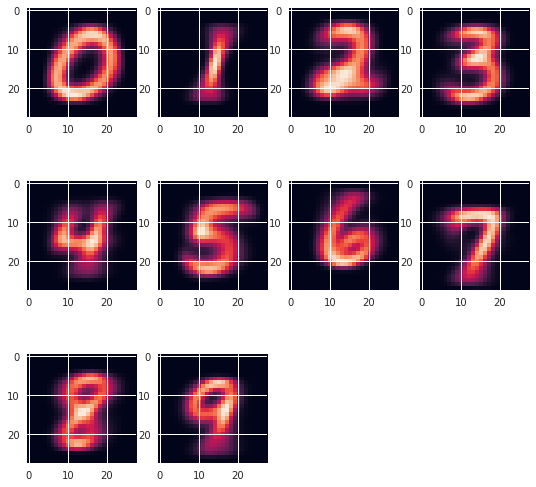